In [2]:
from fastai.text import TextLMDataBunch as lmdb, load_data
from fastai.text.learner import language_model_learner
from fastai.text.models import AWD_LSTM
from fastai.callbacks import EarlyStoppingCallback, SaveModelCallback, ReduceLROnPlateauCallback, CSVLogger
from fastai.train import ShowGraph
import pandas as pd
from pathlib import Path

In [12]:
path = Path('../lang_model/')
path.absolute()

PosixPath('/ds/notebooks/../lang_model')

# 1. Load DataBunch

You have to redefine or import any custom you defined in the last step, because the data bunch is going to look for that.

In [13]:
def pass_through(x):
    return x

In [6]:
data_lm = load_data(path, bs=120)

# 2. Instantiate Language Model

We are going to use the `awd_lstm` with the default parameters listed in the config file below:

In [9]:
learn = language_model_learner(data=data_lm,
                               arch=AWD_LSTM,
                               pretrained=False)

# 3. Train Language Model

### Find the best learning rate

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


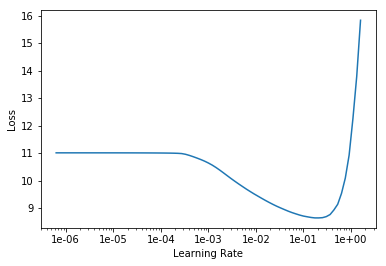

In [15]:
learn.recorder.plot()

In [ ]:
best_lr = 1e-2 * 2

#### Define callbacks

In [9]:
escb = EarlyStoppingCallback(learn=learn, patience=5)
smcb = SaveModelCallback(learn=learn)
rpcb = ReduceLROnPlateauCallback(learn=learn, patience=3)
sgcb = ShowGraph(learn=learn)
csvcb = CSVLogger(learn=learn)

callbacks = [escb, smcb, rpcb, sgcb, csvcb]

#### Train Model

Note: I don't actually do this in a notebook.  I execute training from a shell script at the root of this repository [run_train.sh](https://github.com/machine-learning-apps/IssuesLanguageModel/blob/master/run_train.sh)

In [ ]:
learn.fit_one_cycle(cyc_len=1,
                    max_lr=1e-3,
                    tot_epochs=10,
                    callbacks=callbacks)

epoch,train_loss,valid_loss,accuracy,time
